# 線形回帰モデルとニューラルネットワークの比較

In [11]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston = load_boston()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [13]:
# Describe the Boston dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
print("説明変数")
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df_data.shape)
display(df_data.head())

print("目的変数")
display(boston.target[:10])

説明変数
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


目的変数


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


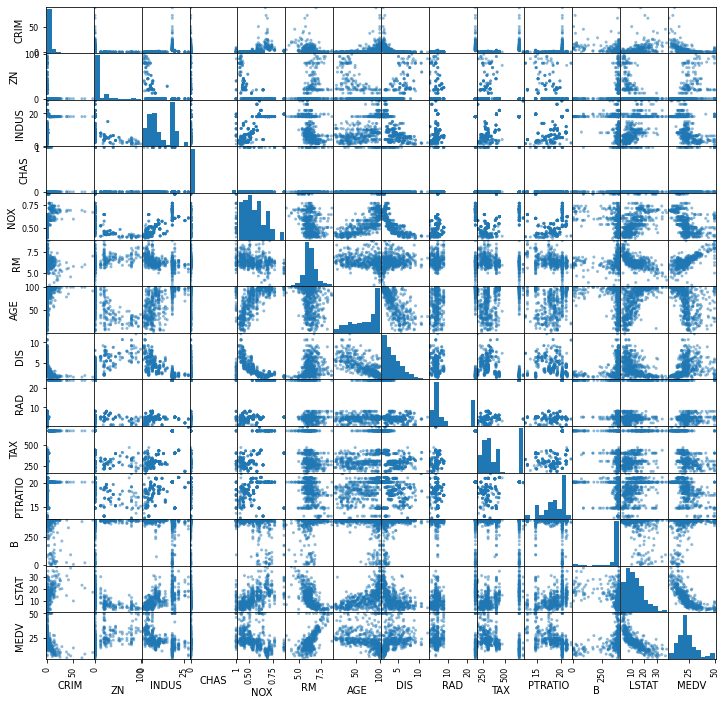

In [15]:
# 可視化
df = pd.concat([df_data, pd.DataFrame(boston.target, columns=["MEDV"])], axis=1)
display(df.corr().round(2))
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

### データセット

In [5]:
X = df_data[["LSTAT"]].values
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.3,  random_state=1234)

# 標準化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
std = StandardScaler()
y_train = std.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1)[0]
y_test = std.transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

### 線形回帰でモデリングする

In [7]:
# 学習
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

MSE= 0.4987617444520942
切片= 8.39593395566766e-17 回帰係数= [-0.73177683]


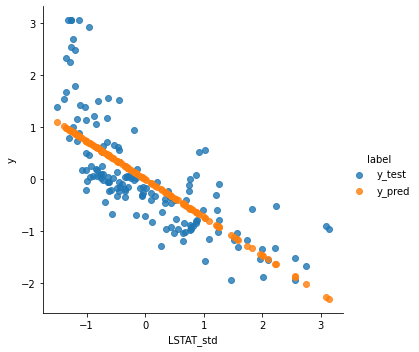

In [8]:
# 予測
y_pred =reg.predict(X_test)
df_result = pd.DataFrame(y_pred, columns=["linearRegression"])
print("MSE=",mean_squared_error(y_test, y_pred))
print("切片=", reg.intercept_, "回帰係数=", reg.coef_)

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()

### ニューラルネットワークでモデリングする

In [16]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 46.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

2022-09-07 03:30:43.683502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-07 03:30:43.953114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 03:30:43.953234: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-07 03:30:43.983792: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-07 03:30:45.225514: W tensorflow/stream_executor/platform/de

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


2022-09-07 03:31:00.703375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-07 03:31:00.703491: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-07 03:31:00.704211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2e802fa0aeff): /proc/driver/nvidia/version does not exist
2022-09-07 03:31:00.704847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
12/12 [==============================] - 1s 23ms/step - loss: 0.5269 - mse: 0.5269 - val_loss: 0.5563 - val_mse: 0.5563
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 0.4851 - mse: 0.4851 - val_loss: 0.5055 - val_mse: 0.5055
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 0.4687 - mse: 0.4687 - val_loss: 0.5035 - val_mse: 0.5035
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4669 - mse: 0.4669 - val_loss: 0.4978 - val_mse: 0.4978
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 0.4670 - mse: 0.4670 - val_loss: 0.4979 - val_mse: 0.4979
Epoch 6/200
12/12 [==============================] - 0s 7ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.4971 - val_mse: 0.4971
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 0.4694 - mse: 0.4694 - val_loss: 0.4983 - val_mse: 0.4983
Epoch 8/200
12/12 [==============================] - 0s 8ms/step - loss: 0.4667 - 

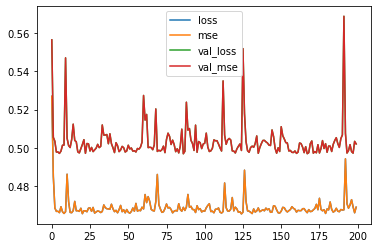

In [18]:
batch_size = 32
epochs = 200

# ネットワークの設定
model = Sequential()
model.add(Dense(10, activation='linear', input_shape=(1,)))
# model.add(Dense(5, activation='linear'))
model.add(Dense(1, activation='linear')) #この活性化関数は変更してはならない
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=SGD(),
              metrics=['mse'])

# 計算
history = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数
                    verbose=1,         # ログ出力
                    validation_data=(X_test, y_test))

# 計算過程の描画
pd.DataFrame(history.history).plot()
plt.show()


5/5 [==============================] - 0s 3ms/step


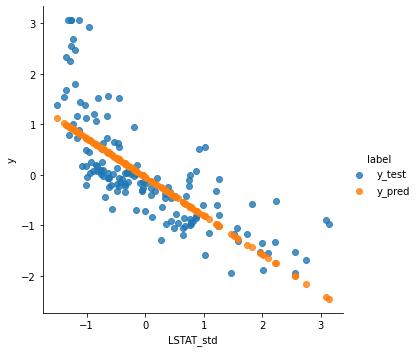

In [19]:
# 予測
y_pred = model.predict(X_test)
df_result["NN"] = y_pred

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()


### [演習]
* 中間層の数を3層(ノード数は10と5)に変更してみましょう
* 中間層の活性化関数をsigmoidに変更してみましょう